# Optimising trimming of GPS library ONT sequencing data
Using cutadapt as it allows for trimming of internal adapters:

**5'-nnnnnnNNN[ORF]nnn[Barcode]NNNnnnnnn-3'**

Cutadapt can take **5'-NNN** and **NNN-3'** sequences and keep the sequence in between, and will also reverse complement sequences and trim them correctly if there was no match with the plus strand. 

Keep untrimmed sequences in a separate file, which is useful for QC.

The bit that probably requires optimisation is the error tolerance as this is ONT data.

Subset the raw fastq to 10k reads for testing purposes:

In [1]:
%%bash

DATA_DIR="/media/niek/4TB_SSD2/analyses/GPS_ONT"
RAW_FASTQ="$DATA_DIR/284LHC_1_GPS-S1S6-L1L6.fastq.gz"
RAW_FASTQ_TEST="$DATA_DIR/test.fastq.gz"

zcat "$RAW_FASTQ" | head -n 40000 | gzip > "$RAW_FASTQ_TEST"

First run cutadapt with standard error rate settings and `-O 20` (minimum overlap of 20 bp for adapter match):


In [13]:
%%bash

DATA_DIR="/media/niek/4TB_SSD2/analyses/GPS_ONT"
RAW_FASTQ_TEST="$DATA_DIR/test.fastq.gz"

cutadapt -g "TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT" \
    --untrimmed-output $DATA_DIR/untrimmed_01.fastq \
    --revcomp \
	-O 20 \
    -o $DATA_DIR/cutadapt_test_01.fastq $RAW_FASTQ_TEST > cutadapt_01.log

```shell
This is cutadapt 5.2 with Python 3.12.12
Command line parameters: -g TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT --untrimmed-output /media/niek/4TB_SSD2/analyses/GPS_ONT/untrimmed.fastq --revcomp -O 20 -o /media/niek/4TB_SSD2/analyses/GPS_ONT/cutadapt_output.fastq /media/niek/4TB_SSD2/analyses/GPS_ONT/test.fastq.gz
Processing single-end reads on 1 core ...

=== Summary ===

Total reads processed:                  10,000
Reads with adapters:                     3,516 (35.2%)
Reverse-complemented:                    1,695 (17.0%)

== Read fate breakdown ==
Reads discarded as untrimmed:            6,484 (64.8%)
Reads written (passing filters):         3,516 (35.2%)

Total basepairs processed:    75,852,059 bp
Total written (filtered):      3,561,913 bp (4.7%)

=== Adapter 1 ===

Sequence: TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT; Type: linked; Length: 24+24; 5' trimmed: 3516 times; 3' trimmed: 3516 times; Reverse-complemented: 1695 times

Minimum overlap: 20+20
No. of allowed errors:
1-9 bp: 0; 10-19 bp: 1; 20-24 bp: 2

No. of allowed errors:
1-9 bp: 0; 10-19 bp: 1; 20-24 bp: 2
```

35.2% of reads have the adapter sequence, which is not bad for ONT data. 

Next try: increase error rate for full-length adapter match (default was 0.1, which is 2 errors for a 24 bp adapter, but we may have to allow more errors with ONT data).

Increase error rate to 0.125 (3 errors for a 24 bp adapter):

In [14]:
%%bash

DATA_DIR="/media/niek/4TB_SSD2/analyses/GPS_ONT"
RAW_FASTQ_TEST="$DATA_DIR/test.fastq.gz"

cutadapt -g "TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT" \
    --untrimmed-output $DATA_DIR/untrimmed_02.fastq \
    --revcomp \
    -e 0.125 \
	-O 20 \
	-o $DATA_DIR/cutadapt_test_02.fastq $RAW_FASTQ_TEST > cutadapt_02.log

```shell
This is cutadapt 5.2 with Python 3.12.12
Command line parameters: -g TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT --untrimmed-output /media/niek/4TB_SSD2/analyses/GPS_ONT/untrimmed.fastq --revcomp -e 0.125 -O 20 -o /media/niek/4TB_SSD2/analyses/GPS_ONT/cutadapt_test_02.fastq /media/niek/4TB_SSD2/analyses/GPS_ONT/test.fastq.gz
Processing single-end reads on 1 core ...

=== Summary ===

Total reads processed:                  10,000
Reads with adapters:                     3,743 (37.4%)
Reverse-complemented:                    1,803 (18.0%)

== Read fate breakdown ==
Reads discarded as untrimmed:            6,257 (62.6%)
Reads written (passing filters):         3,743 (37.4%)

Total basepairs processed:    75,852,059 bp
Total written (filtered):      3,815,584 bp (5.0%)

=== Adapter 1 ===

Sequence: TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT; Type: linked; Length: 24+24; 5' trimmed: 3743 times; 3' trimmed: 3743 times; Reverse-complemented: 1803 times

Minimum overlap: 20+20
No. of allowed errors:
1-7 bp: 0; 8-15 bp: 1; 16-23 bp: 2; 24 bp: 3

No. of allowed errors:
1-7 bp: 0; 8-15 bp: 1; 16-23 bp: 2; 24 bp: 3
```

Reads with adapters increased to 37.4%.

Next try: increase error rate to 0.17 (4 errors for a 24 bp adapter):


In [15]:
%%bash

DATA_DIR="/media/niek/4TB_SSD2/analyses/GPS_ONT"
RAW_FASTQ_TEST="$DATA_DIR/test.fastq.gz"

cutadapt -g "TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT" \
    --untrimmed-output $DATA_DIR/untrimmed_03.fastq \
    --revcomp \
    -e 0.17 \
	-O 20 \
	-o $DATA_DIR/cutadapt_test_03.fastq $RAW_FASTQ_TEST > cutadapt_03.log

```shell
This is cutadapt 5.2 with Python 3.12.12
Command line parameters: -g TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT --untrimmed-output /media/niek/4TB_SSD2/analyses/GPS_ONT/untrimmed.fastq --revcomp -e 0.17 -O 20 -o /media/niek/4TB_SSD2/analyses/GPS_ONT/cutadapt_test_03.fastq /media/niek/4TB_SSD2/analyses/GPS_ONT/test.fastq.gz
Processing single-end reads on 1 core ...

=== Summary ===

Total reads processed:                  10,000
Reads with adapters:                     3,847 (38.5%)
Reverse-complemented:                    1,873 (18.7%)

== Read fate breakdown ==
Reads discarded as untrimmed:            6,153 (61.5%)
Reads written (passing filters):         3,847 (38.5%)

Total basepairs processed:    75,852,059 bp
Total written (filtered):      3,930,160 bp (5.2%)

=== Adapter 1 ===

Sequence: TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT; Type: linked; Length: 24+24; 5' trimmed: 3847 times; 3' trimmed: 3847 times; Reverse-complemented: 1873 times

Minimum overlap: 20+20
No. of allowed errors:
1-4 bp: 0; 5-10 bp: 1; 11-16 bp: 2; 17-22 bp: 3; 23-24 bp: 4

No. of allowed errors:
1-4 bp: 0; 5-10 bp: 1; 11-16 bp: 2; 17-22 bp: 3; 23-24 bp: 4
```

Allowing 4 errors for a 24 bp adapter increases the number of reads with adapters to 38.5% (1.1% increase from allowing 3 errors).

Finally, try 5 errors for a 24 bp adapter (error rate of 0.21):

In [ ]:
%%bash

DATA_DIR="/media/niek/4TB_SSD2/analyses/GPS_ONT"
RAW_FASTQ_TEST="$DATA_DIR/test.fastq.gz"

cutadapt -g "^TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT$" \
    --untrimmed-output $DATA_DIR/untrimmed_04.fastq \
    --revcomp \
    -e 0.21 \
	-O 20 \
	-o $DATA_DIR/cutadapt_test_04.fastq $RAW_FASTQ_TEST > cutadapt_04.log

```shell
This is cutadapt 5.2 with Python 3.12.12
Command line parameters: -g TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT --untrimmed-output /media/niek/4TB_SSD2/analyses/GPS_ONT/untrimmed_04.fastq --revcomp -e 0.21 -O 20 -o /media/niek/4TB_SSD2/analyses/GPS_ONT/cutadapt_test_04.fastq /media/niek/4TB_SSD2/analyses/GPS_ONT/test.fastq.gz
Processing single-end reads on 1 core ...

=== Summary ===

Total reads processed:                  10,000
Reads with adapters:                     5,621 (56.2%)
Reverse-complemented:                    2,755 (27.6%)

== Read fate breakdown ==
Reads discarded as untrimmed:            4,379 (43.8%)
Reads written (passing filters):         5,621 (56.2%)

Total basepairs processed:    75,852,059 bp
Total written (filtered):      5,758,815 bp (7.6%)

=== Adapter 1 ===

Sequence: TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT; Type: linked; Length: 24+24; 5' trimmed: 5621 times; 3' trimmed: 5621 times; Reverse-complemented: 2755 times

Minimum overlap: 20+20
No. of allowed errors:
1-3 bp: 0; 4-8 bp: 1; 9-13 bp: 2; 14-18 bp: 3; 19-22 bp: 4; 23-24 bp: 5

No. of allowed errors:
1-3 bp: 0; 4-8 bp: 1; 9-13 bp: 2; 14-18 bp: 3; 19-22 bp: 4; 23-24 bp: 5
```

Increasing to 5 errors made a big difference, with 56.2% of reads having the adapter sequence. 

This is more inline with what is expected from NanoPlot QC of the data, which shows that ~50% of the reads have a length >10kb (see plot below), which is the expected size of the GPS library fragments.

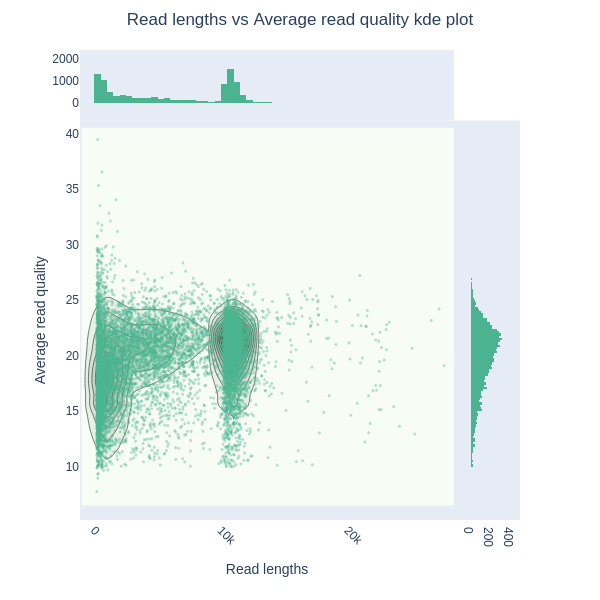

Importantly, about half of the 56.2% of reads with adapters were reverse complemented (27.6%), which is expected as the plus and minus strands of the digested plasmid should be present in equal proportions.

Try increasing error rate even more to 0.25 (6 errors for a 24 bp adapter) to see if we can get even more reads with adapters:

In [17]:
%%bash

DATA_DIR="/media/niek/4TB_SSD2/analyses/GPS_ONT"
RAW_FASTQ_TEST="$DATA_DIR/test.fastq.gz"

cutadapt -g "TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT" \
    --untrimmed-output $DATA_DIR/untrimmed_05.fastq \
    --revcomp \
    -e 0.25 \
	-O 20 \
	-o $DATA_DIR/cutadapt_test_05.fastq $RAW_FASTQ_TEST > cutadapt_05.log

```shell
This is cutadapt 5.2 with Python 3.12.12
Command line parameters: -g TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT --untrimmed-output /media/niek/4TB_SSD2/analyses/GPS_ONT/untrimmed_05.fastq --revcomp -e 0.25 -O 20 -o /media/niek/4TB_SSD2/analyses/GPS_ONT/cutadapt_test_05.fastq /media/niek/4TB_SSD2/analyses/GPS_ONT/test.fastq.gz
Processing single-end reads on 1 core ...

=== Summary ===

Total reads processed:                  10,000
Reads with adapters:                     5,739 (57.4%)
Reverse-complemented:                    2,805 (28.1%)

== Read fate breakdown ==
Reads discarded as untrimmed:            4,261 (42.6%)
Reads written (passing filters):         5,739 (57.4%)

Total basepairs processed:    75,852,059 bp
Total written (filtered):      5,870,810 bp (7.7%)

=== Adapter 1 ===

Sequence: TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT; Type: linked; Length: 24+24; 5' trimmed: 5739 times; 3' trimmed: 5739 times; Reverse-complemented: 2805 times

Minimum overlap: 20+20
No. of allowed errors:
1-3 bp: 0; 4-7 bp: 1; 8-11 bp: 2; 12-15 bp: 3; 16-19 bp: 4; 20-23 bp: 5; 24 bp: 6

No. of allowed errors:
1-3 bp: 0; 4-7 bp: 1; 8-11 bp: 2; 12-15 bp: 3; 16-19 bp: 4; 20-23 bp: 5; 24 bp: 6
```


------
Marginally more reads with adapters (57.4% vs 56.2%) with the highest error rate allowed. 

Stick with `-e 0.21` for trimming the full dataset as this is more stringent and will likely result in fewer false positives.

Final `cutadapt` command:

```bash
cutadapt -g "TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT" \
    --untrimmed-output $DATA_DIR/untrimmed.fastq \
    --revcomp \
    -e 0.21 \
	-O 20 \
	-o $DATA_DIR/trimmed.fastq $RAW_FASTQ > cutadapt.log
```


Next, we wanted to have a better look at the test trimming results to see if the adapter sequences were trimmed correctly and if the read sequences after trimming are in line with expectations for the GPS library fragments.
For this we took the first 7 trimmed sequences (from cutadapt_test_04.fastq) and performed a multiple sequence alignment using Clustal Omega (https://www.ebi.ac.uk/jdispatcher/msa/clustalo):

```
R5                          ACTAGGGCCTCATGGGCCCAGCTTTCTTGGTACAAAGTGGTTTAATGAGTTTAAACCTCG	384
R6                          CAGGACATGGGGCCCTGCCCAACTTTCTTGTACAAAGTGGTTTAATGAGTTTAAACCTCG	1099
R4                          CGGCTGTGGTCCAGCTGCCCAACTTTCTTGTACAAAGTGGTTTAATGAGTTTAAACCTCG	525
R7                          ATCGTGGCCTTCTAGAACCCAGCTTTCTTGTACAAAGTGGTTTAATGAGTTTAAACCTCG	1025
R3                          AGGAAGCCACCCTAGAACCCAGCTTTCTTGTACAAAGTGGTTTAATGAGTTTAAACCTCG	1474
R2                          CCCCTCACCAGGTAGAACCCAGCTTTCTTGTACAAAGTGGTTTAATGAGTTTAAACCTCG	377
R1                          TGGTGTGTATCCTAGAACCCAGCTTTCTTGTACAAAGTGGTTTAATGAGTTTAAACCTCG	441
Internal_linker_Middle      ---------------AACCCAGCTTTCTTGTACAAAGTGGTTTAATGAGTTTAAACCTCG	45
                                             **    **  * *******************************

R5                          AGCGTAACTATAACGGTCCTAAGGTAGCGAACCAGTAGGTCCACTATGAGTTTCGCGCGG	444
R6                          AGCGTAACTATAACGGTCCTAAGGTAGCGAACCAGTAGGTCCACTATGAGTATTCCACGG	1159
R4                          AGCGTAACTATAACGGTCCTAAGGTAGCGAACCAGTAGGTCCACTATGAGTACTCGGGGA	585
R7                          AGCGTAACTATAACGGTCCTAAGGTAGCGAACCAGTAGGTCCACTATGAGTTGGGATTTA	1085
R3                          AGCGTAACTATAACGGTCCTAAGGTAGCGAACCAGTAGGTCCACTATGAGTATTGTGGGC	1534
R2                          AGCGTAACTATAACGGTCCTAAGGTAGCGAACCAGTAGGTCCACTATGAGTGCTTGGCTA	437
R1                          AGCGTAACTATAACGGTCCTAAGGTAGCGAACCAGTAGGTCCACTATGAGTTAATAGGCT	501
Internal_linker_Middle      AGCGTAACTATAACGGTCCTAAGGTAGCGAA-----------------------------	76
                            *******************************                             

R5                          AGTGCTACAACAGGGCGTGCG--	465
R6                          GTCCCCCGTCTCATCCGTATT--	1180
R4                          ATAAACACTACATAGGGTTGTAT	608
R7                          GCTAGCGGCTAGGAC--------	1100
R3                          CGTGATCTTCTGCGA--------	1549
R2                          TCTTTGGAGAAATCA--------	452
R1                          GGGAGTGGTCAGTCC--------	516
Internal_linker_Middle      -----------------------	76
```

Unexpected results:
- The 5'end of the linker seems inconsistent with some reads (R4,5,6). The sequences also don't seem to have a stop codon.
- At the 3' end the sequence after the linker should be 24 bp. R4,5,6 seem to have longer sequences. The other reads have exact 24 bp downstream of the linker, which is the expected barcode length.

Try `cutadapt` again, but filter the reads for Q > 15 to see if this improves the trimming results for the 5' end of the linker:

In [23]:
%%bash

DATA_DIR="/media/niek/4TB_SSD2/analyses/GPS_ONT"
RAW_FASTQ_TEST="$DATA_DIR/test.fastq.gz"

{
	zcat "$RAW_FASTQ_TEST" | \
	chopper -q 15 | \
	cutadapt -g "TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT" \
		--untrimmed-output "$DATA_DIR/untrimmed_06.fastq" \
		--revcomp \
		-e 0.25 \
		-O 20 \
		-o "$DATA_DIR/cutadapt_test_06.fastq" - 
} &> cutadapt_test_06.log


Relevant log contents:

```shell
This is cutadapt 5.2 with Python 3.12.12
Command line parameters: -g TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT --untrimmed-output /media/niek/4TB_SSD2/analyses/GPS_ONT/untrimmed_06.fastq --revcomp -e 0.25 -O 20 -o /media/niek/4TB_SSD2/analyses/GPS_ONT/cutadapt_test_06.fastq -
Processing single-end reads on 1 core ...
Kept 9167 reads out of 10000 reads

=== Summary ===

Total reads processed:                   9,167
Reads with adapters:                     5,487 (59.9%)
Reverse-complemented:                    2,695 (29.4%)

== Read fate breakdown ==
Reads discarded as untrimmed:            3,680 (40.1%)
Reads written (passing filters):         5,487 (59.9%)

Total basepairs processed:    71,917,288 bp
Total written (filtered):      5,621,338 bp (7.8%)

=== Adapter 1 ===

Sequence: TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT; Type: linked; Length: 24+24; 5' trimmed: 5487 times; 3' trimmed: 5487 times; Reverse-complemented: 2695 times

Minimum overlap: 20+20
No. of allowed errors:
1-3 bp: 0; 4-7 bp: 1; 8-11 bp: 2; 12-15 bp: 3; 16-19 bp: 4; 20-23 bp: 5; 24 bp: 6

No. of allowed errors:
1-3 bp: 0; 4-7 bp: 1; 8-11 bp: 2; 12-15 bp: 3; 16-19 bp: 4; 20-23 bp: 5; 24 bp: 6
```

About 10% of reads had Q < 15, but following this filtering trimming increased to 59.9% (vs 56.2% without filtering). 

Use this filtering step for trimming the full dataset to improve trimming results.

SLURM script to run chopper/cutadapt on the full dataset with the optimised parameters:
------
```bash
#!/bin/bash

#SBATCH -A JNATHAN-SL2-CPU
#SBATCH --mail-type=BEGIN,END,FAIL
#SBATCH -p cclake
#SBATCH -D /home/nw416/rds/rds-jan_1-tpuFdqHBAEk/gps_ont
#SBATCH -o ont_trim_%j.log
#SBATCH -c 12
#SBATCH -t 4:00:00
#SBATCH -J ont_trim
#SBATCH --mem=24G

# Initialize Conda for script usage
source "/home/nw416/miniforge3/etc/profile.d/conda.sh"
conda activate ont

DATA_DIR=/home/nw416/rds/rds-jan_1-tpuFdqHBAEk/gps_ont
RAW_FASTQ="$DATA_DIR/284LHC_1_GPS-S1S6-L1L6.fastq.gz"

echo "Starting job $SLURM_JOB_ID at $(date)" > trim.log

{
    zcat -f $RAW_FASTQ | \
    chopper -t 4 -q 15 | \
    cutadapt -g "TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT" \
        --untrimmed-output "$DATA_DIR/untrimmed.fastq.gz" \
        --revcomp \
        -e 0.21 \
        -O 20 \
        -j 8 \
        -o "$DATA_DIR/trimmed.fastq.gz" - 
} &>> trim.log

echo "Finished job at $(date)" >> trim.log
```
File name: 02_trim.sh

------


Contents of `cutadapt.log` after running on the full dataset:

```shell
Starting job 23453863 at Wed 25 Feb 12:20:15 GMT 2026
This is cutadapt 5.2 with Python 3.12.12
Command line parameters: -g TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT --untrimmed-output /home/nw416/rds/rds-jan_1-tpuFdqHBAEk/gps_ont/untrimmed.fastq.gz --revcomp -e 0.21 -O 20 -j 8 -o /home/nw416/rds/rds-jan_1-tpuFdqHBAEk/gps_ont/trimmed.fastq.gz -
Processing single-end reads on 8 cores ...
Kept 27832846 reads out of 31098617 reads

=== Summary ===

Total reads processed:              27,832,846
Reads with adapters:                13,329,423 (47.9%)
Reverse-complemented:                6,490,660 (23.3%)

== Read fate breakdown ==
Reads discarded as untrimmed:       14,503,423 (52.1%)
Reads written (passing filters):    13,329,423 (47.9%)

Total basepairs processed: 178,843,630,693 bp
Total written (filtered):  13,622,666,905 bp (7.6%)

=== Adapter 1 ===

Sequence: TTGTACAAAAAAGCAGGCACCATG...AGCTGTGTAAGCGGAACTAGAGTT; Type: linked; Length: 24+24; 5' trimmed: 13329423 times; 3' trimmed: 13329423 times; Reverse-complemented: 6490660 times

Minimum overlap: 20+20
No. of allowed errors:
1-3 bp: 0; 4-8 bp: 1; 9-13 bp: 2; 14-18 bp: 3; 19-22 bp: 4; 23-24 bp: 5

No. of allowed errors:
1-3 bp: 0; 4-8 bp: 1; 9-13 bp: 2; 14-18 bp: 3; 19-22 bp: 4; 23-24 bp: 5
```
------

For the complete dataset, 47.9% of reads had the adapter sequence (23.3% reverse-complemented), which is lower than the 56.2% observed in the test dataset, but still a good proportion of reads with adapters considering this is ONT data.

We have 13,329,423 trimmed reads which gives us 13,329,423/~180,000=**74.1x coverage of the GPS library**, which is more than initially expected/required (20-50x).

## Trimming QC

### Plot the median read length pre- and post-trimming.

First, get the read length distributions:

```shell
#!/bin/bash

#SBATCH -A JNATHAN-SL2-CPU
#SBATCH --mail-type=BEGIN,END,FAIL
#SBATCH -p cclake
#SBATCH -D /home/nw416/rds/rds-jan_1-tpuFdqHBAEk/gps_ont
#SBATCH -o trim_qc.log
#SBATCH -c 4
#SBATCH -t 04:00:00
#SBATCH -J trim_qc
#SBATCH --mem=8G

# Initialize Conda for script usage
source "/home/nw416/miniforge3/etc/profile.d/conda.sh"
conda activate ont

DATA_DIR=/home/nw416/rds/rds-jan_1-tpuFdqHBAEk/gps_ont
TRIMMED_FASTQ=$DATA_DIR/trimmed.fastq.gz
RAW_FASTQ=$DATA_DIR/284LHC_1_GPS-S1S6-L1L6.fastq.gz

# Get read length distributions of pre-trim FASTQ


# Get read length distributions of post-trim FASTQ


```

